In [3]:
# LIBRERIAS UTILIZADAS
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [4]:
def encoder(bits, SF):
    simbolo = 0
    
    for j in range(SF):   
        ponderacion = 2 ** (SF - 1 - j)
        simbolo = bits[j] * ponderacion + simbolo

    return simbolo

In [5]:
def print_waveform_former(señal, señalF):
  print("----------------------------------------------------------------- WAVEFORM FORMER -----------------------------------------------------------------------------")

  t = np.arange(0, len(señal), 1)

  plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
  plt.subplot(3,1,1)
  plt.plot(t, np.real(señal))
  plt.title('Símbolo s modulado en el tiempo, parte real')
  plt.xlabel('tiempo')
  plt.ylabel('amplitud')   
  plt.grid()

  plt.subplot(3,1,2)   
  plt.plot(t, np.imag(señal))
  plt.title('Símbolo s modulado en el tiempo, parte imaginaria')
  plt.xlabel('tiempo')
  plt.ylabel('amplitud')
  plt.grid()
    
  plt.subplot(3,1,3)
  plt.plot(t, señalF)
  plt.title('Variación lineal de la frecuencia')
  plt.xlabel('tiempo')
  plt.ylabel('Frecuencia')
  plt.grid()

  plt.subplots_adjust(left=0.125,
                  bottom=0.1,
                  right=0.9,
                  top=0.9,
                  wspace=0.2,
                  hspace=0.35)

  plt.show()

  print("---------------------------------------------------------------------------------------------------------------------------------------------------------------")

def waveform_former(simbolo, SF, BW):
  T = 1 / BW
  numMuestras = 2 ** SF
    
  señal = np.zeros(numMuestras, dtype=complex)
  señalF = np.zeros(numMuestras, dtype=int)
    
  for k in range(numMuestras):
    f = (simbolo + k) % numMuestras 
    t = k * T
        
    muestra = (1 / (np.sqrt(numMuestras))) * np.exp(1j * 2 * np.pi * f * t)
    
    señal[k] = muestra
    señalF[k] = f
  
  return señal, señalF

In [6]:
def generate_downChirp(SF, BW, numMuestras):
    T = 1 /  BW

    downChirp = np.zeros(numMuestras, dtype=complex)
    downChirpF = np.zeros(numMuestras, dtype=int)

    for k in range (numMuestras):
        f = k % numMuestras
        t = k * T
        
        muestra = (1 / (np.sqrt(BW))) * np.exp(-1j * 2 * np.pi * f * t)

        downChirp[k] = muestra
        downChirpF[k] = f
    
    return downChirp, downChirpF

def print_downChirp(downChirp, downChirpF, numMuestras):
    print("----------------------------------------------------------------- NTUPLA FORMER -----------------------------------------------------------------------------")

    t=np.arange(0, numMuestras, 1)

    plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(t, np.real(downChirp))
    plt.title('Base down chirp')
    plt.xlabel('tiempo')
    plt.ylabel('amplitud')
    
    plt.subplot(2,1,2)
    plt.plot(t, (numMuestras - downChirpF))
    plt.title('Variación lineal de la frecuencia')
    plt.xlabel('tiempo')
    plt.ylabel('frecuencia')

    plt.subplots_adjust(left=0.125,
                bottom=0.1,
                right=0.9,
                top=0.9,
                wspace=0.2,
                hspace=0.35)

    plt.grid()
    
    plt.show()

def print_dft(dft):
    plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(dft)
    plt.title('Espectro de Frecuencia')
    plt.xlabel('frecuencia')
    plt.ylabel('amplitud')
    plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
    
    plt.grid()
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------------------------------------------------")

def ntuple_former(señal, SF, BW):
    numMuestras = len(señal)
    downChirp, downChirpF = generate_downChirp(SF, BW, numMuestras)

    dechirping = np.multiply(señal, downChirp)
    dft = np.abs(np.fft.fft(dechirping))
    simboloEstimado = np.argmax(dft)

    return simboloEstimado, downChirp, downChirpF, numMuestras, dft

In [7]:
def decoder(simboloEstimado, SF):
    bitsDecodificados = np.zeros(SF, dtype=int)

    for j in range(SF):
        if simboloEstimado % 2 == 1:
            bitsDecodificados[SF - 1 - j] = 1
        else:
            bitsDecodificados[SF - 1 - j] = 0

        simboloEstimado = simboloEstimado // 2

    return bitsDecodificados

In [8]:
def ruido_awgn(señal, snr_db):
    snr = 10 ** (snr_db / 10)
    potencia_señal = np.mean(np.abs(señal) ** 2)  # Var = (Esperanza - Media)**2 (En este caso la media es 0 por eso no aparece)
    potencia_ruido = potencia_señal / snr

    ruido = np.sqrt(potencia_ruido / 2) * (np.random.randn (len(señal)) + 1j * np.random.randn(len(señal)))
    
    return  señal + ruido

In [9]:
def print_grafica_ber_ser(bers, sers, rango_snr_db):
    plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.semilogy(rango_snr_db, bers, 's--b', label='BER (AWGN)')
    plt.xlabel('SNR [dB]')
    plt.ylabel('Bit Error Rate')
    plt.title('BER para FSCM en canales AWGN')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.subplot(2,1,2)
    plt.semilogy(rango_snr_db, sers, 's--r', label='SER (AWGN)')
    plt.xlabel('SNR [dB]')
    plt.ylabel('Symbol Error Rate')
    plt.title('SER para FSCM en canales AWGN')

    plt.subplots_adjust(left=0.125,
                bottom=0.1,
                right=0.9,
                top=0.9,
                wspace=0.2,
                hspace=0.35)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.show()

In [10]:
def canal_selectivo_frecuencia(señal):
    h = np.array([np.sqrt(0.8), np.sqrt(0.2)])  
    salidaCanal = np.convolve(señal, h, mode='same')   # Utilizamos SAME ya que el tamaño del resultado de la convolucion donde se solapan totalmente ambas señales es 127 y las señales son de 128

    return salidaCanal 

In [11]:
def print_analsis(SER, BER):
    print("---------------------------------------------------------- ANALISIS DE LA TRANSMICION -------------------------------------------------------------------")
    print("Probabilidad de error de simbolo (SER):", SER)
    print("Tasa de error de bit (BER):", BER)
    print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

def calculoSER(simbolo, simboloEstimado):
    # Calcular la probabilidad de error de simbolo (SER)
    simboloError = 0
    
    if simbolo != simboloEstimado:
        simboloError += 1
        
    SER = simboloError / 1
    
    return SER, simboloError

def calculoBER(bitsGenerados, bitsDecodificados, SF):
    # Calcular la tasa de error de bit (BER)
    bitError = 0

    for j in range(SF):
        if (bitsGenerados[j] != bitsDecodificados[j]):
            bitError += 1 

    BER = bitError / SF 

    return BER, bitError

In [12]:
def simulacion_ideal(n, SF, BW):
    print(">> Simulacion Ideal de" , n , "simbolos con un SF de" , SF, " <<")

    # Generacion de n cantidad de simbolos
    simbolos = np.zeros(n, dtype=int)
    bitsGeneradosTotales = np.zeros((n ,SF), dtype=int)

    print("--------------------------------------------------------------------- ENCODER ---------------------------------------------------------------------------------")  

    for i in range(n):
        bits = np.random.randint(0, 2, SF)  
        simbolo = encoder(bits, SF)
        
        simbolos[i] = simbolo
        bitsGeneradosTotales[i] = bits
    
        print("Bits generados: ", bits[:10])
        print("Símbolo codificado: ", simbolo)
    
    print("---------------------------------------------------------------------------------------------------------------------------------------------------------------")

    # Generacion de waveform para cada simbolo segun la modulacion LoRa
    señalTransmitida = np.zeros(n * (2 ** SF), dtype=complex)
    señalTransmitidaF = np.zeros(n * (2 ** SF), dtype=complex)
    
    for i in range(n):
        # Llamado a la etapa de waveform former
        señal, señalF = waveform_former(simbolos[i], SF, BW)
        
        señalTransmitida[(i * (2 ** SF)) : ((i + 1) * (2 ** SF))] = señal
        señalTransmitidaF[(i * (2 ** SF)) : ((i + 1) * (2 ** SF))] = señalF

    print_waveform_former(señalTransmitida, señalTransmitidaF)

    # Desmodulacion de la waveform generada
    simbolosEstimados = np.zeros(n, dtype=int)
    
    for i in range(n):
        # Adquisicion de la waveform de cada simbolo
        señal = señalTransmitida[(i * (2 ** SF)) : ((i + 1) * (2 ** SF))]

        # Llamado a la etapa de NTuple Former
        simboloEstimado, downChirp, downChirpF, numMuestras, dft  = ntuple_former(señal, SF, BW)
        simbolosEstimados[i] = simboloEstimado
        
        print_dft(dft)
    
    print_downChirp(downChirp, downChirpF, numMuestras)
    

    # Generacion de los bits correspondiente a los simbolos estimados
    bitsDecodificadosTotales = np.zeros((n ,SF), dtype=int)

    print("--------------------------------------------------------------------- DECODER ---------------------------------------------------------------------------------")
    
    for i in range(n):
        # Llamado a la etapa de decoder
        bitsDecodificados = decoder(simbolosEstimados[i], SF)
        bitsDecodificadosTotales[i] = bitsDecodificados
        
        print("Simbolo Estimado Recibido: ", simbolosEstimados[i])
        print("Bits decodificados: ", bitsDecodificados[:10])

    print("---------------------------------------------------------------------------------------------------------------------------------------------------------------")

    # Generacion de SER y BER
    SERTotal = 0
    BERTotal = 0
    simbolErrorTotal = 0
    bitErrorTotal = 0

    for i in range(n):
        SER, simbolError = calculoSER(simbolos[i], simbolosEstimados[i]) 
        BER, bitError = calculoBER(bitsGeneradosTotales[i], bitsDecodificadosTotales[i], SF) 
    
        simbolErrorTotal += simbolError
        bitErrorTotal += bitError

    SERTotal = simbolErrorTotal / n
    BERTotal = bitErrorTotal / (SF * n)
        
    print_analsis(SERTotal, BERTotal)

In [13]:
def simulacion_con_awgn(SF, BW, snr_db, numSimulaciones):
    simbolErrorTotal = 0
    bitErrorTotal = 0
    SERTotal = 0
    BERTotal = 0
    
    for i in range(numSimulaciones):
        # Generacion de un simbolo
        bitsGenerados = np.random.randint(0, 2, SF)  
        simbolo = encoder(bitsGenerados, SF)
        
        # Generacion de una waveform para el simbolo segun la modulacion LoRa
        señalTransmitida, señalTransmitidaF = waveform_former(simbolo, SF, BW)

        # Aplicacion del ruido AWGN
        señalRecibida = ruido_awgn(señalTransmitida, snr_db)

        # Desmodulacion de la waveform generada
        simboloEstimado, downChirp, downChirpF, numMuestras, dft  = ntuple_former(señalRecibida, SF, BW)

        # Generacion de los bits correspondiente al simbolo estimado
        bitsDecodificados = decoder(simboloEstimado, SF)

        # Generacion de SER y BER
        SER, simbolError = calculoSER(simbolo, simboloEstimado) 
        BER, bitError = calculoBER(bitsGenerados, bitsDecodificados, SF) 
    
        simbolErrorTotal += simbolError
        bitErrorTotal += bitError

    SERTotal = simbolErrorTotal / numSimulaciones
    BERTotal = bitErrorTotal / (SF * numSimulaciones)

    return SERTotal, BERTotal

In [14]:
def simulacion_con_canal_selectivo(SF, BW, snr_db, numSimulaciones):
    simbolErrorTotal = 0
    bitErrorTotal = 0
    SERTotal = 0
    BERTotal = 0
    
    for i in range(numSimulaciones):
        # Generacion de un simbolo
        bitsGenerados = np.random.randint(0, 2, SF)  
        simbolo = encoder(bitsGenerados, SF)

        # Generacion de una waveform para el simbolo segun la modulacion LoRa
        señalTransmitida, señalTransmitidaF = waveform_former(simbolo, SF, BW)
        
        # Efecto del canal selectivo en frecuencia
        señalFiltrada = canal_selectivo_frecuencia(señalTransmitida)  # Esta señal tendra un tamaño distinto a la transmitida

        # Aplicacion del ruido AWGN
        señalRecibida = ruido_awgn(señalFiltrada, snr_db)  

        # Desmodulacion de la waveform generada
        simboloEstimado, downChirp, downChirpF, numMuestras, dft  = ntuple_former(señalRecibida, SF, BW)

        # Generacion de los bits correspondiente al simbolo estimado
        bitsDecodificados = decoder(simboloEstimado, SF)

        # Generacion de SER y BER
        SER, simbolError = calculoSER(simbolo, simboloEstimado) 
        BER, bitError = calculoBER(bitsGenerados, bitsDecodificados, SF) 
    
        simbolErrorTotal = simbolErrorTotal + simbolError
        bitErrorTotal = bitErrorTotal + bitError

    SERTotal = simbolErrorTotal / numSimulaciones
    BERTotal = bitErrorTotal / (SF * numSimulaciones)

    return SERTotal, BERTotal

>> Simulacion Ideal de 3 simbolos con un SF de 10  <<
--------------------------------------------------------------------- ENCODER ---------------------------------------------------------------------------------
Bits generados:  [1 0 1 1 1 1 1 1 1 1]
Símbolo codificado:  767
Bits generados:  [0 1 0 1 0 0 0 0 1 1]
Símbolo codificado:  323
Bits generados:  [0 1 0 0 1 1 0 0 0 0]
Símbolo codificado:  304
---------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------- WAVEFORM FORMER -----------------------------------------------------------------------------


/home/santiagoalasia/Documentos/Proyectos-UNC/ProyectoIntegrador_ComDig/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/santiagoalasia/Documentos/Proyectos-UNC/ProyectoIntegrador_ComDig/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


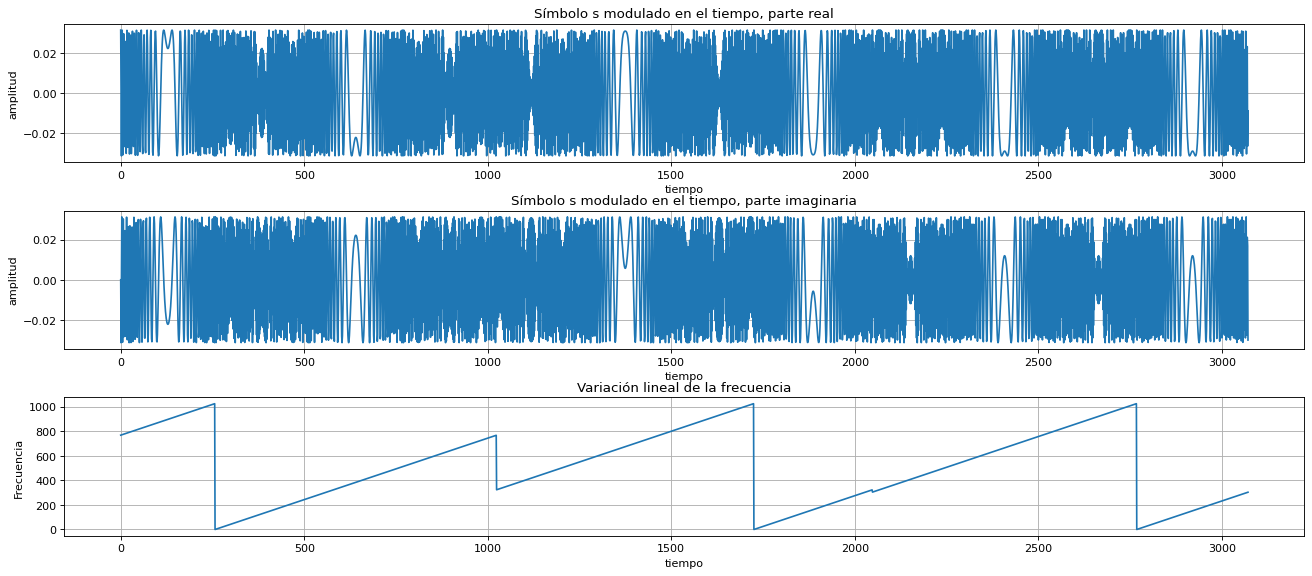

---------------------------------------------------------------------------------------------------------------------------------------------------------------


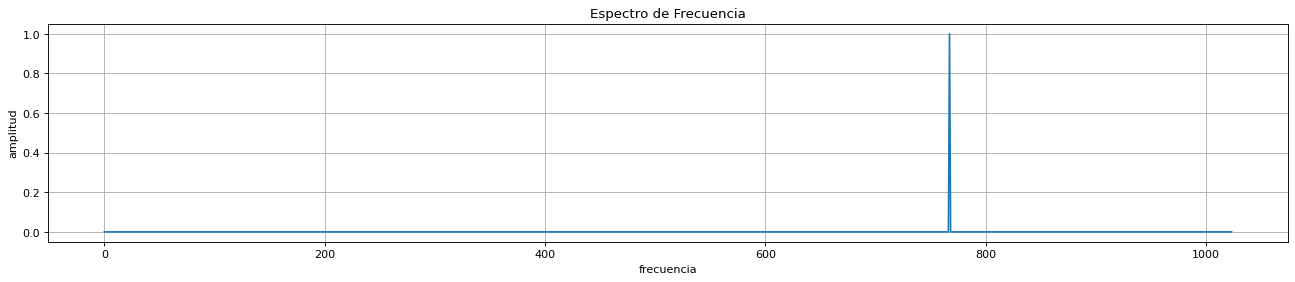

---------------------------------------------------------------------------------------------------------------------------------------------------------------


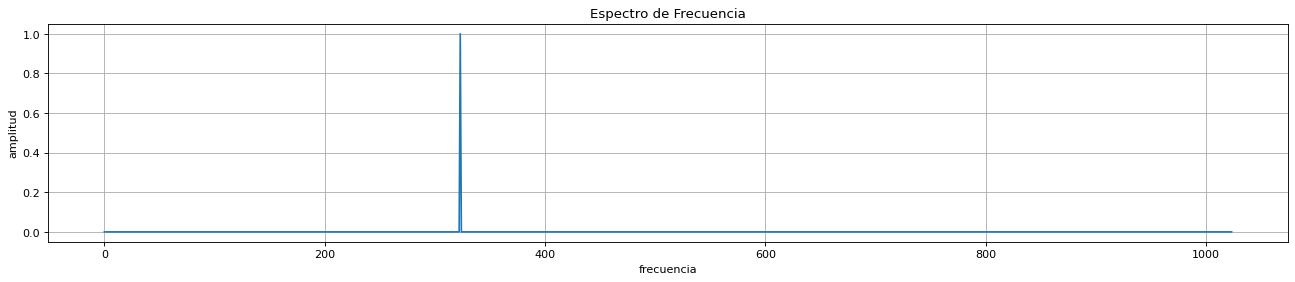

---------------------------------------------------------------------------------------------------------------------------------------------------------------


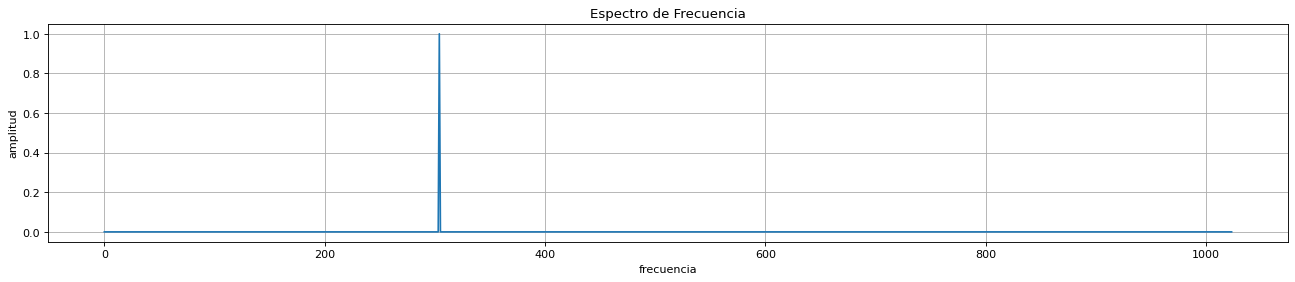

---------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------- NTUPLA FORMER -----------------------------------------------------------------------------


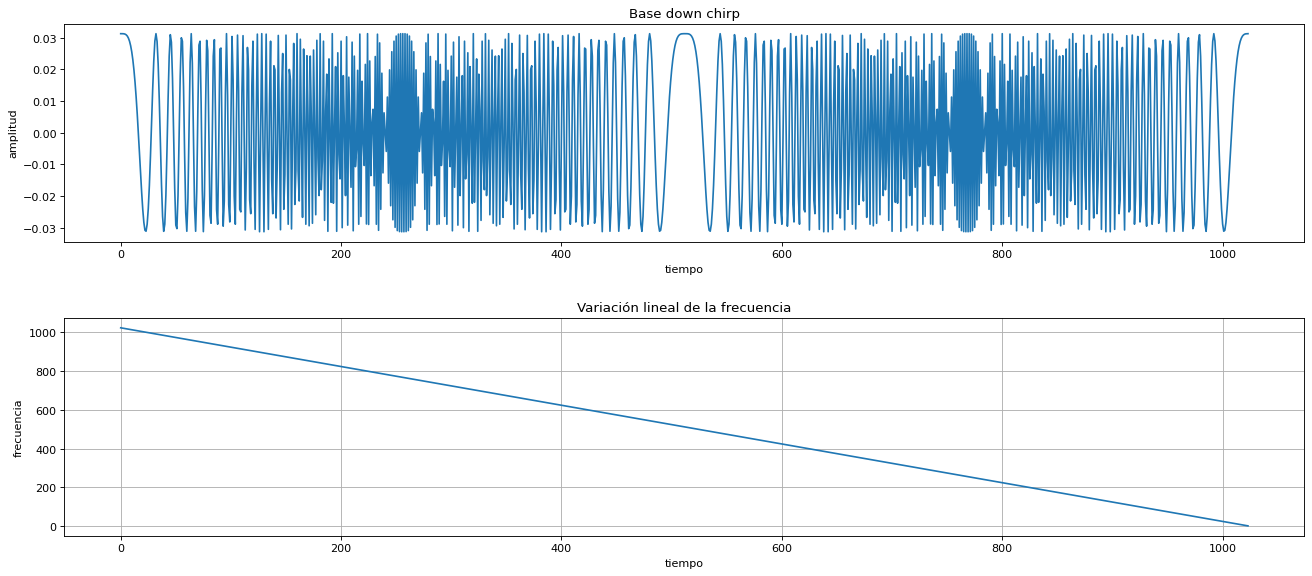

--------------------------------------------------------------------- DECODER ---------------------------------------------------------------------------------
Simbolo Estimado Recibido:  767
Bits decodificados:  [1 0 1 1 1 1 1 1 1 1]
Simbolo Estimado Recibido:  323
Bits decodificados:  [0 1 0 1 0 0 0 0 1 1]
Simbolo Estimado Recibido:  304
Bits decodificados:  [0 1 0 0 1 1 0 0 0 0]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------- ANALISIS DE LA TRANSMICION -------------------------------------------------------------------
Probabilidad de error de simbolo (SER): 0.0
Tasa de error de bit (BER): 0.0
---------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
## Selector del tipo de simulacion
tipoDeSimulacion = int(input("Ingrese el número de simulación (1: Ideal, 2: AWGN, 3: Canal selectivo): "))

if tipoDeSimulacion == 1:
    ## Simulacion Ideal
    n = 3    # Cantidad de simbolos que queremos transmitir por trama
    SF = 10  # Spreading Factor para esta simulacion
    BW = 2 ** SF  # Ancho de banda, en el paper se define como 2 ** SF

    simulacion_ideal(n, SF, BW)

elif tipoDeSimulacion == 2:    
    ## Simulacion son Ruido AWGN
    SF = 7  # Spreading Factor para esta simulacion
    BW = 2 ** SF  # Ancho de banda, en el paper se define como 2 ** SF
    
    rango_snr_db = np.arange(-10, -6, 1)
    BERS = np.zeros(4, dtype=float)   # Array de 4 BER, cada uno correspondiente a cada SNR del array rango_snr_db
    SERS = np.zeros(4, dtype=float)    # Array de 4 SER, cada uno correspondiente a cada SNR del array rango_snr_db
    
    numSimulaciones = np.array([100, 1000, 10000, 100000])        # Cantidad de simulaciones por valor de SNR
    i = 0

    for snr_db in tqdm(rango_snr_db, desc=">> Simulacion con Ruido AWGN"):
        SER, BER = simulacion_con_awgn(SF, BW, snr_db, numSimulaciones[i])

        SERS[i] = SER 
        BERS[i] = BER

        i += 1

    print_grafica_ber_ser(BERS, SERS, rango_snr_db)

elif tipoDeSimulacion == 3:
    ## Simulacion con canal selectivo en frecuencia
    SF = 7    # Spreading Factor para esta simulacion
    BW = 2 ** SF    # Ancho de banda, en el paper se define como 2 ** SF
    rango_snr_db = np.arange(-9, -2, 1)
    
    BERS = np.zeros(7, dtype=float)   # Array de 4 BER, cada uno correspondiente a cada SNR del array rango_snr_db
    SERS = np.zeros(7, dtype=float)    # Array de 4 SER, cada uno correspondiente a cada SNR del array rango_snr_db
    
    numSimulaciones = np.array([100, 1000, 1000, 1000, 10000, 10000, 100000])        # Cantidad de simulaciones por valor de SNR
    i = 0

    for snr_db in tqdm(rango_snr_db, desc=">> Simulacion con Canal Selectivo en Frecuencia"):
        SER, BER = simulacion_con_canal_selectivo(SF, BW, snr_db, numSimulaciones[i])
    
        SERS[i] = SER 
        BERS[i] = BER

        i += 1

    print_grafica_ber_ser(BERS, SERS, rango_snr_db)

else: 
    print("Tipo de Simulacion No Valida...")